In [1]:
import Orange

In [2]:
import pickle

from collections import Counter

import pandas as pd
import seaborn as sns

from sklearn.metrics import accuracy_score, confusion_matrix, classification_report

In [4]:
import pandas as pd

base = pd.read_csv('cov_types.csv')
base

,Elevation,Aspect,Slope,Horizontal_Distance_To_Hydrology,Vertical_Distance_To_Hydrology,Horizontal_Distance_To_Roadways,Hillshade_9am,Hillshade_Noon,Hillshade_3pm,Horizontal_Distance_To_Fire_Points,Wilderness_Area,Soil_Type,Cover_Type
0,2767.0,66.0,17.0,210.0,18.0,1190.0,234.0,204.0,96.0,2251.0,2,30,Lodgepole Pine
1,2724.0,160.0,19.0,60.0,4.0,1350.0,236.0,240.0,127.0,2514.0,2,16,Lodgepole Pine
2,2360.0,65.0,7.0,127.0,21.0,1377.0,227.0,226.0,134.0,339.0,3,5,Ponderosa Pine
3,2995.0,45.0,4.0,285.0,30.0,5125.0,221.0,231.0,146.0,5706.0,0,11,Lodgepole Pine
4,2400.0,106.0,27.0,150.0,63.0,342.0,253.0,196.0,51.0,811.0,2,3,Ponderosa Pine
...,...,...,...,...,...,...,...,...,...,...,...,...,...
9995,2917.0,90.0,9.0,247.0,25.0,4095.0,235.0,225.0,121.0,3901.0,0,28,Lodgepole Pine
9996,3015.0,38.0,8.0,361.0,74.0,4846.0,220.0,223.0,138.0,1611.0,0,28,Lodgepole Pine
9997,3052.0,79.0,19.0,90.0,11.0,1003.0,241.0,203.0,85.0,1490.0,2,22,Spruce/Fir
9998,2958.0,58.0,6.0,319.0,19.0,2468.0,225.0,227.0,137.0,2280.0,0,28,Lodgepole Pine


In [5]:
base.rename(columns={"Cover_Type":"c#Cover_Type"}, inplace = True)
base

,Elevation,Aspect,Slope,Horizontal_Distance_To_Hydrology,Vertical_Distance_To_Hydrology,Horizontal_Distance_To_Roadways,Hillshade_9am,Hillshade_Noon,Hillshade_3pm,Horizontal_Distance_To_Fire_Points,Wilderness_Area,Soil_Type,c#Cover_Type
0,2767.0,66.0,17.0,210.0,18.0,1190.0,234.0,204.0,96.0,2251.0,2,30,Lodgepole Pine
1,2724.0,160.0,19.0,60.0,4.0,1350.0,236.0,240.0,127.0,2514.0,2,16,Lodgepole Pine
2,2360.0,65.0,7.0,127.0,21.0,1377.0,227.0,226.0,134.0,339.0,3,5,Ponderosa Pine
3,2995.0,45.0,4.0,285.0,30.0,5125.0,221.0,231.0,146.0,5706.0,0,11,Lodgepole Pine
4,2400.0,106.0,27.0,150.0,63.0,342.0,253.0,196.0,51.0,811.0,2,3,Ponderosa Pine
...,...,...,...,...,...,...,...,...,...,...,...,...,...
9995,2917.0,90.0,9.0,247.0,25.0,4095.0,235.0,225.0,121.0,3901.0,0,28,Lodgepole Pine
9996,3015.0,38.0,8.0,361.0,74.0,4846.0,220.0,223.0,138.0,1611.0,0,28,Lodgepole Pine
9997,3052.0,79.0,19.0,90.0,11.0,1003.0,241.0,203.0,85.0,1490.0,2,22,Spruce/Fir
9998,2958.0,58.0,6.0,319.0,19.0,2468.0,225.0,227.0,137.0,2280.0,0,28,Lodgepole Pine


In [6]:
base.to_csv('cov_types.csv', index = False)

In [7]:
base = Orange.data.Table('cov_types.csv')

In [8]:
base.domain

[Elevation, Aspect, Slope, Horizontal_Distance_To_Hydrology, Vertical_Distance_To_Hydrology, Horizontal_Distance_To_Roadways, Hillshade_9am, Hillshade_Noon, Hillshade_3pm, Horizontal_Distance_To_Fire_Points, Wilderness_Area, Soil_Type | Cover_Type]

In [9]:
base_teste, base_treino = Orange.evaluation.testing.sample(base, n=0.25)

In [10]:
len(base_treino), len(base_teste)

(7500, 2500)

In [13]:
cn2_classifier = Orange.classification.rules.CN2Learner()
rules = cn2_classifier(base_treino)

In [14]:
for i, rule in enumerate(rules.rule_list):
    print(rule)
    if i == 10:
        break

IF Horizontal_Distance_To_Roadways>=6445.0 THEN Cover_Type=Lodgepole Pine 
IF Horizontal_Distance_To_Fire_Points>=4457.0 AND Hillshade_9am>=254.0 THEN Cover_Type=Aspen 
IF Horizontal_Distance_To_Fire_Points>=4457.0 AND Soil_Type>=38.0 THEN Cover_Type=Spruce/Fir 
IF Horizontal_Distance_To_Fire_Points>=4457.0 AND Slope>=24.0 THEN Cover_Type=Lodgepole Pine 
IF Elevation>=3361.0 AND Elevation>=3681.0 THEN Cover_Type=Krummholz 
IF Horizontal_Distance_To_Roadways>=5253.0 AND Horizontal_Distance_To_Roadways>=6425.0 THEN Cover_Type=Spruce/Fir 
IF Horizontal_Distance_To_Roadways>=5253.0 AND Horizontal_Distance_To_Roadways>=6404.0 THEN Cover_Type=Lodgepole Pine 
IF Horizontal_Distance_To_Roadways>=5253.0 AND Hillshade_9am>=244.0 THEN Cover_Type=Lodgepole Pine 
IF Elevation>=3361.0 AND Elevation>=3624.0 THEN Cover_Type=Spruce/Fir 
IF Elevation>=3361.0 AND Hillshade_3pm>=201.0 THEN Cover_Type=Spruce/Fir 
IF Soil_Type>=34.0 AND Hillshade_3pm>=200.0 AND Elevation>=3232.0 THEN Cover_Type=Spruce/Fir 


In [16]:
y_pred = rules(base_teste)
y_pred

array([6, 4, 6, ..., 3, 4, 4], shape=(2500,))

In [18]:
y_test = base_teste.Y
y_test

array([4., 4., 6., ..., 3., 6., 4.], shape=(2500,))

In [19]:
accuracy_score(y_test, y_pred)

0.682

In [20]:
cm = confusion_matrix(y_test, y_pred)
cm

array([[  7,   0,   0,   0,  28,   1,   4],
       [  0,   7,   1,   0,   0,   3,   0],
       [  1,   0,  19,   0,  16,  22,   2],
       [  0,   0,   0,  62,   3,   0,  32],
       [ 34,   0,  21,   4, 929,  18, 272],
       [  2,   7,  14,   0,  17,  88,   0],
       [  3,   0,   0,  29, 259,   2, 593]])

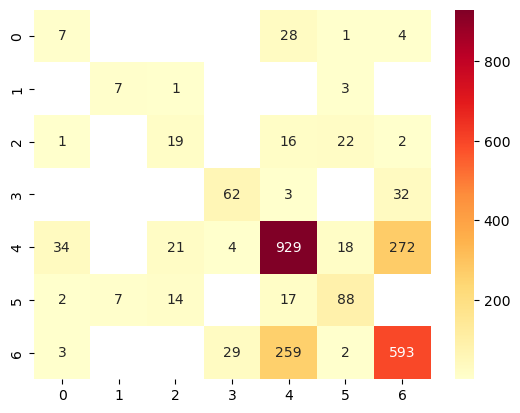

In [21]:
sns.heatmap(cm,
            annot=True, # para exibir as contagens nas células do gráfico
            fmt='d', # para que os valores sejam em formato inteiro
            cmap='YlOrRd', # o mesmo mapa de cor do yellowbrick
            mask = (cm == 0) # não exibe os valores e a cor onde o valor for igual a 0
            );

In [22]:
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

         0.0       0.15      0.17      0.16        40
         1.0       0.50      0.64      0.56        11
         2.0       0.35      0.32      0.33        60
         3.0       0.65      0.64      0.65        97
         4.0       0.74      0.73      0.73      1278
         5.0       0.66      0.69      0.67       128
         6.0       0.66      0.67      0.66       886

    accuracy                           0.68      2500
   macro avg       0.53      0.55      0.54      2500
weighted avg       0.68      0.68      0.68      2500



In [23]:
majority = Orange.classification.MajorityLearner()

In [24]:
y_test = Orange.evaluation.testing.TestOnTestData(base, base, [majority])

In [25]:
Orange.evaluation.CA(y_test)

array([0.4847])

In [26]:
Counter(str(instance.get_class()) for instance in base)

Counter({'Lodgepole Pine': 4847,
         'Spruce/Fir': 3714,
         'Ponderosa Pine': 581,
         'Krummholz': 362,
         'Douglas-fir': 278,
         'Aspen': 163,
         'Cottonwood/Willow': 55})

In [27]:
len(base)

10000